In [60]:
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import gridspec
import scipy
style.use('ggplot')
import datetime
from io import StringIO
import re
import numpy as np
from datetime import datetime
import math
from matplotlib.texmanager import TexManager


sns.set_style('whitegrid')
sns.set_palette('colorblind')
FIG_SIZE = (12, 3)
TexManager.font_info['Times New Roman'] = ('Times New Roman', r'\usepackage{Times New Roman}')

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 30}
plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['text.usetex'] = True

plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['axes.labelsize']= 22
plt.rcParams['lines.linewidth']= 2
plt.rcParams['lines.markersize']= 2

In [58]:
npm.sort_values('dep_pro', ascending=False, inplace=True)
npm['dep_pro']=npm['dep_pro'].apply(int)
df=npm.head(1000).loc[:,[]]

In [59]:
df.reset_index().to_csv('../../../top_depend_upon.csv', sep=';', index=True)

In [5]:
# Already prepared the data for the NPM_FINAL dataframe
#Filter: at least 700 days, github, 
npm_packages=pd.read_csv('../../popularity/csv/npm_popularity_2yearsOld.csv', sep=';', dtype=object, index_col='name')

npm_packages['first_release']=npm_packages['first_release'].apply(lambda x:
                                                                  float("".join(re.findall("[0-9.]+", x))) if 'day' in x 
                                                                  else float("".join(re.findall("[0-9.]+", x)))*30 if 'month' in x
                                                                  else (datetime.now().date() - 
                                                                        datetime.strptime(x, '%b %d, %Y').date()).days)

for x in npm_packages:
    #if x!= "first_release":
    npm_packages[x]=npm_packages[x].apply(float)
    npm_packages[x]=npm_packages[x].apply(int)
        

npm_packages.drop_duplicates(inplace=True)
npm_packages.drop('contributors', axis=1, inplace=True)

npm2=pd.read_csv('../../popularity/csv/only_npm.csv', sep=',', dtype=object, index_col=None)
npm2=npm2.loc[:,['Name','Repository URL']]
npm2=npm2.rename(columns = {'Name':'name','Repository URL':'url'})

npm2=npm2.set_index('name').merge(npm_packages,
                               left_index=True, 
                               right_index=True,
                               how='outer').dropna().reset_index()
npm2.dropna(inplace=True)

In [6]:
# remove duplicates, take only the popular ones with unique repository name
npm=npm2.sort_values('downloads', ascending=False)
npm['url']=npm['url'].apply(lambda x: x.split('/')[-2]+'-'+x.split('/')[-1])
npm=npm.groupby('url').first().reset_index()
npm.set_index('name', inplace=True)
len(npm)

175774

In [61]:
len(npm.query('stars_npm==0'))/len(npm)

0.7625644293240184

In [67]:
corrr=npm.loc[:,['forks','stars_github','pulls_issues','subscribers']]
ax=corrr.corr(method="spearman").style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [70]:
type(ax)

pandas.io.formats.style.Styler

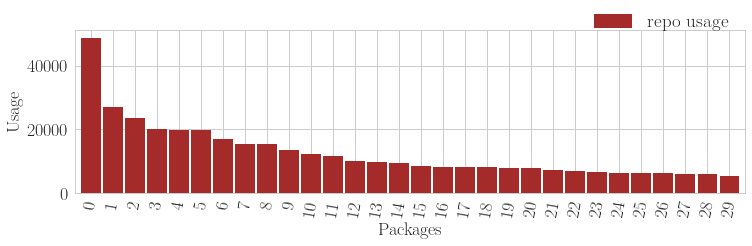

In [88]:
df=npm.sort_values('dependents', ascending=False)
df=df.head(30)
df['repo usage']=df['dependents']
ax=df.plot(kind='bar', color=['brown'], y='repo usage', width=0.9)
ax.set_ylabel('Usage ')
ax.set_xlabel(' Packages')
ax.legend( loc='upper right', 
          bbox_to_anchor=(1, 1.2), fontsize=19,ncol=3, fancybox=True, shadow=True)
plt.xticks(rotation='80')
#ax.set_yscale('log')
ax.figure.set_size_inches(12,3)

In [6]:
f=list(df.index)+list(df2.index)
len(set(f))

55

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


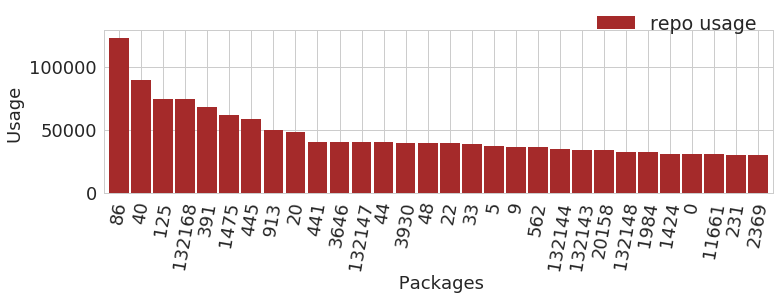

In [86]:
df2=npm.sort_values('stars_github', ascending=False)
df2=df2.loc[:,['stars_github']]
df2.drop_duplicates(inplace=True)
df2=df2.sort_values('stars_github', ascending=False)
df2=df2.head(30)

df2['repo usage']=df2['stars_github']
ax=df2.plot(kind='bar', color=['brown'], y='repo usage', width=0.9)
ax.set_ylabel('Usage ')
ax.set_xlabel(' Packages')
ax.legend( loc='upper right', 
          bbox_to_anchor=(1, 1.2), fontsize=19,ncol=3, fancybox=True, shadow=True)
plt.xticks(rotation='80')
#ax.set_yscale('log')
ax.figure.set_size_inches(12,3)

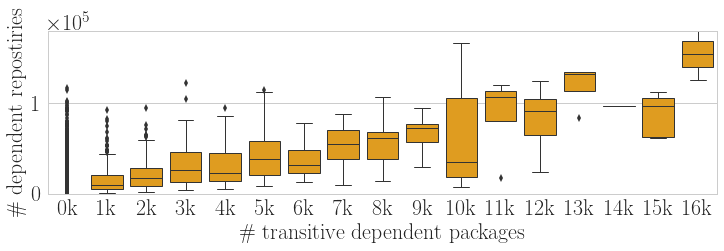

In [47]:
df=npm.sort_values(['dep_pro'],ascending=False)
df.query('dep_pro<18000', inplace=True)
df.sort_values('dep_pro', inplace=True)
df['dep_pro']=df['dep_pro'].apply(lambda x: str(int(x/1000))+'k')


ax = sns.boxplot(x="dep_pro", y="dep_repo", data=df,  color="orange", linewidth=1)
ax.figure.set_size_inches(11,3)
for patch in ax.patches:
    patch.set_edgecolor('black')
for x in ax.artists:
    x.set_edgecolor('.2')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.3), ncol=3, fontsize=20, fancybox=True, shadow=True)
plt.setp(ax.lines, color=".2", mfc='.2', mec='.2')

ax.figure.set_size_inches(12,3)
#ax.set_xlim(0,50)
ax.set_ylim(0,180000)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('\# transitive dependent packages')
ax.set_ylabel('\# dependent repostiries')
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax.figure.savefig('../../../seneca_research/npm_popularity/figures/dep_pro_repo.pdf', bbox_inches='tight', facecolor='white')
#color_map = plt.cm.Spectral_r
#fig=plt.figure(figsize=(10,9))
#ax = fig.add_subplot(111)
#image = plt.hexbin(data=df, x='dep_pro', y='dep_repo',cmap=color_map,gridsize=500,mincnt=1,bins='log')
#cb = plt.colorbar(image,spacing='uniform',extend='max')

#z = np.polyfit(df['downloadsCount'], df['downloadsAcceleration'], 2)
#p = np.poly1d(z)
#plt.plot(df['downloadsCount'],p(df['downloadsCount']),"brown", linestyle='--', linewidth=5)



In [26]:
npm['usage']=(npm['dep_pro'] + npm['dep_repo'])
npm['community_interest']=(npm['stars_github']+
                          npm['forks']+
                          (npm['pulls_issues']*npm['pulls_issues'])
                          )
             

In [47]:
#Pearsonr R correlation
scipy.stats.pearsonr(npm['downloads'].values,
                     npm['usage'].values)

(0.014441672707381351, 1.4041490864558899e-09)

In [49]:
#Spearmanr R correlation
scipy.stats.spearmanr(npm['downloads'].values,
                     npm['usage'].values)

SpearmanrResult(correlation=0.55335771076440554, pvalue=0.0)

In [66]:
if False:
    df=npm_packages.sort_values(['dep_pro'],ascending=False)
    df.query('dep_pro<15000', inplace=True)
    df.sort_values('dep_pro', inplace=True)

    color_map = plt.cm.Spectral_r
    fig=plt.figure(figsize=(10,9))
    ax = fig.add_subplot(111)
    image = plt.hexbin(data=df, x='dep_pro', y='dep_repo',cmap=color_map,gridsize=500,mincnt=1,bins='log')
    cb = plt.colorbar(image,spacing='uniform',extend='max')
    ax.set_xlim(0,2000)
    ax.set_ylim(0,100000)
    ax.figure.set_size_inches(12,3)



In [59]:

for x in npm:
    if x!= "name" and x!= "url":
        npm[x]=npm[x].apply(float)
        npm[x]=npm[x].apply(int)

In [4]:
# TOP 1000 DOWNLOADED
npm.reset_index(inplace=True)
top=1000
npm.sort_values('downloads', inplace=True, ascending=False)
df_downloads=npm.head(top).loc[:,['name']]
df_downloads['type']='downloads'

# TOP 1000 STARRED
npm.sort_values('stars_npm', inplace=True, ascending=False)
df_stars=npm.head(top).loc[:,['name']]
df_stars['type']='stars npm'

# TOP 1000 SUBSCRIBED
npm.sort_values('subscribers', inplace=True, ascending=False)
df_subscribers=npm.head(top).loc[:,['name']]
df_subscribers['type']='subscribers'

# TOP 1000 COMMUNITY INTEREST
df_community=npm.sort_values('forks', ascending=False)
df_community['community interest']=(df_community['stars_github']+
                          df_community['forks']+
                          (df_community['pulls_issues']*
                           df_community['pulls_issues'])
                         )
df_community.sort_values('community interest', inplace=True, ascending=False)
df_community=df_community.head(top).loc[:,['name']]
df_community['type']='community interest'

# TOP 1000 USED
df_usage=npm.sort_values('forks', ascending=False)
df_usage['usage']=(df_usage['dep_pro'] + df_usage['dep_repo'])
df_usage.sort_values('usage', inplace=True, ascending=False)
df_usage=df_usage.head(top).loc[:,['name']]
df_usage['type']='usage'

df_all=pd.concat([df_downloads,df_stars,df_subscribers,df_community,df_usage])

In [5]:
npm.sort_values('dependents', inplace=True, ascending=False)
df_dependents=npm.head(top).loc[:,['name']]
df_dependents['top_dependent']='True'


df_all=df_all.set_index('name').merge(df_dependents.
                                      set_index('name'),
                                      left_index=True,
                                      right_index=True,
                                      how='outer').dropna().reset_index()
df_all.drop(['top_dependent'], axis=1, inplace=True)

In [7]:
lis=df_all.groupby('name')['type'].apply(list)
tab= [i for i in lis]
from pymining import seqmining 
freq_seqs = seqmining.freq_seq_enum(tab, 1)
#print("Seuls: ",sorted(freq_seqs))

In [8]:

number={}
number['community interest']=10000
number['downloads']=1000
number['stars npm']=100
number['subscribers']=10
number['usage']=1
tabs={}
for x in freq_seqs:
    result=0
    for y in x[0]:
        result=result+number[y]
    result=str("%05d" % (result,))
    tabs[result]=x[1]

In [2]:
tabs={'00001': 512,
 '00010': 166,
 '00011': 95,
 '00100': 592,
 '00101': 365,
 '00110': 152,
 '00111': 94,
 '01000': 391,
 '01001': 345,
 '01010': 61,
 '01011': 58,
 '01100': 237,
 '01101': 223,
 '01110': 59,
 '01111': 57,
 '10000': 193,
 '10001': 119,
 '10010': 139,
 '10011': 89,
 '10100': 177,
 '10101': 116,
 '10110': 131,
 '10111': 88,
 '11000': 78,
 '11001': 76,
 '11010': 56,
 '11011': 54,
 '11100': 76,
 '11101': 74,
 '11110': 55,
 '11111': 53}

number={'community interest': 10000,
 'downloads': 1000,
 'stars npm': 100,
 'subscribers': 10,
 'usage': 1}

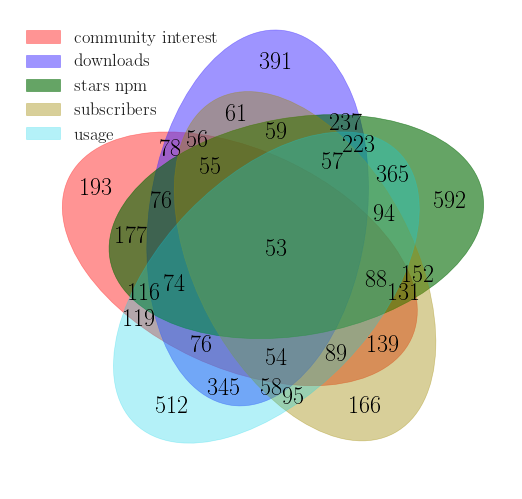

In [3]:
%matplotlib inline
#https://github.com/tctianchi/pyvenn
import venn
plt.rcParams['text.usetex'] = False
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

plt.rcParams['text.usetex'] = True

#labels = venn.get_labels([range(10), range(5, 15), range(3, 8), range(8, 17), range(10, 20)], fill=['number', 'logic'])
fig, ax = venn.venn5(tabs, names=list(sorted(number.keys())))
ax.legend(bbox_to_anchor=(1, 0))
fig.set_size_inches(6,6)
ax.figure.savefig('../../../seneca_research/npm_popularity/figures/venn_pop.pdf', bbox_inches='tight', facecolor='white')


In [2]:
%matplotlib inline
#https://github.com/tctianchi/pyvenn
import venn

In [74]:
#Spearmanr R correlation
scipy.stats.spearmanr(npm.dep_repo,
                     npm.dep_repo)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [72]:
npm.head(1)

,url,first_release,dep_pro,dep_repo,downloads,dependents,stars_npm,stars_github,forks,subscribers,pulls_issues,commits,usage,community interest,community_interest
name,,,,,,,,,,,,,,,
mocha,mochajs-mocha,2348.0,129000,305000.0,74746258.0,3956.0,694.0,15080.0,2112.0,399.0,3304.0,311.0,434000.0,10933608.0,10933608.0


In [73]:
#Pearsonr R correlation
lib=['dep_pro']
scipy.stats.kendalltau(npm.dep_pro,
                     npm.dep_repo)

KendalltauResult(correlation=0.5217533812581916, pvalue=0.0)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Text(0.5,0,'Community interest ')

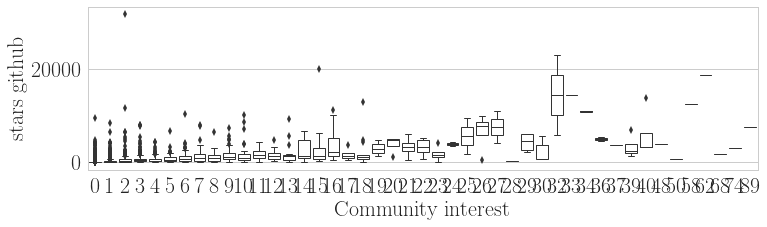

In [81]:
df=npm.query('stars_github<123128')
#df['community_interest']=(df['stars_github']+
#                          df['forks']+
#                          (df['pulls_issues']*
#                           df['pulls_issues'])
#                         )
#df=df.query('community_interest<2000000')
#df.sort_values(['community_interest'],ascending=False, inplace=True)
#df['community_interest']=df['community_interest'].apply(lambda x: int(x/100000))

df.sort_values('stars_github', inplace=True)
df['stars_github']=df['stars_github'].apply(lambda x: int(x/1000))

ax = sns.boxplot(x="stars_github", y="pulls_issues", data=df,  color="white", linewidth=1)
ax.figure.set_size_inches(11,3)
for patch in ax.patches:
    patch.set_edgecolor('black')
for x in ax.artists:
    x.set_edgecolor('.2')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.3), ncol=3, fontsize=20, fancybox=True, shadow=True)

plt.setp(ax.lines, color=".2", mfc='.2', mec='.2')

ax.figure.set_size_inches(12,3)
#ax.set_xlim(0,20)
#ax.set_ylim(0,10000)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('stars github ')
ax.set_xlabel('Community interest ')


In [232]:
npm_packages.query('stars_npm>10')

,first_release,dep_pro,dep_repo,downloads,dependents,stars_npm,stars_github,forks,subscribers,pulls_issues,commits
name,,,,,,,,,,,
Faker,2053,26,238,142944,24,40,214,26,6,21,0
a11y,1275,14,51,53218,9,15,1466,80,52,75,2
abbrev,2576,173,92900,179396325,146,15,122,18,8,16,2
accepts,1564,314,92400,218480709,314,20,140,15,12,15,21
accessibility-developer-tools,1210,24,823,3058726,21,12,1729,263,191,352,1
accounting,2362,100,451,2895006,106,24,3781,419,114,192,0
acl,2428,64,1120,343213,49,60,1871,297,75,263,3
acorn,2023,907,101000,393893493,669,33,3339,339,107,690,137
actionhero,1541,20,109,69475,6,13,1816,208,90,1201,392


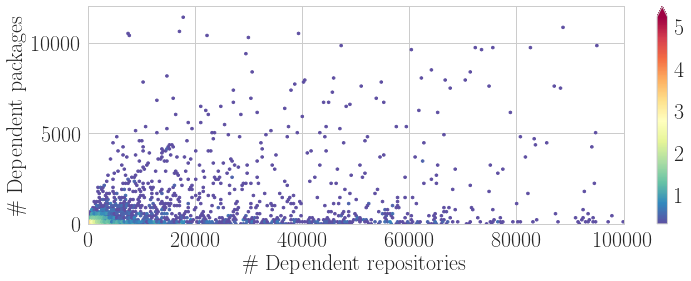

In [113]:

df=npm_packages.query('dep_repo<100000000')


#df.query('dep_pro<15000', inplace=True)
#df.sort_values('dep_pro', inplace=True)
#df['dep_pro']=df['dep_pro'].apply(lambda x: str(int(x/1000))+'k')


color_map = plt.cm.Spectral_r
fig=plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
image = plt.hexbin(data=df, x='dep_repo', y='dep_pro',cmap=color_map,gridsize=1000,mincnt=1,bins='log')
cb = plt.colorbar(image,spacing='uniform',extend='max')
ax.figure.set_size_inches(12,4)
ax.set_xlim(0,100000)
ax.set_ylim(0,12000)
ax.set_ylabel('\# Dependent packages')
ax.set_xlabel('\# Dependent repositories')

#z = np.polyfit(df['downloadsCount'], df['downloadsAcceleration'], 2)
#p = np.poly1d(z)
#plt.plot(df['downloadsCount'],p(df['downloadsCount']),"brown", linestyle='--', linewidth=5)
ax.figure.savefig('../../../seneca_research/npm_popularity/figures/pro_repo.pdf', bbox_inches='tight', facecolor='white')

In [115]:
npm.query('dep_pro>dep_repo').sort_values('downloads', ascending=False)

,url,first_release,dep_pro,dep_repo,downloads,dependents,stars_npm,stars_github,forks,subscribers,pulls_issues,commits,usage,community interest,community_interest
name,,,,,,,,,,,,,,,
simplyimport,danielkalen-simplyimport,839.0,11,9.0,5575430.0,1.0,1.0,4.0,1.0,1.0,18.0,66.0,20.0,329.0,329.0
unist-util-find-all-after,syntax-tree-unist-util-find-all-after,943.0,13,5.0,2104346.0,13.0,1.0,5.0,0.0,2.0,4.0,10.0,18.0,21.0,21.0
co-ware,fundon-co-ware,1494.0,3,2.0,1860669.0,1.0,0.0,16.0,2.0,2.0,5.0,0.0,5.0,43.0,43.0
remove-trailing-slash,stephenmathieson-remove-trailing-slash,1715.0,7,6.0,1820957.0,12.0,0.0,1.0,0.0,1.0,0.0,0.0,13.0,1.0,1.0
coalescy,royriojas-coalescy,1131.0,3,2.0,1585460.0,5.0,1.0,1.0,0.0,1.0,0.0,0.0,5.0,1.0,1.0
payments,wix-payments,1060.0,2,0.0,1291739.0,0.0,0.0,6.0,3.0,278.0,2.0,14.0,2.0,13.0,13.0
node-oauth1,czardoz-node-oauth1,815.0,3,0.0,1266106.0,1.0,0.0,0.0,0.0,20.0,5.0,2.0,3.0,25.0,25.0
tagged-template-literals,steelbrain-tagged-template-literals,756.0,2,1.0,1041344.0,1.0,0.0,2.0,2.0,1.0,8.0,1.0,3.0,68.0,68.0
download-git-repo,flipxfx-download-git-repo,821.0,293,234.0,1028639.0,573.0,24.0,198.0,34.0,2.0,35.0,12.0,527.0,1457.0,1457.0


In [182]:
df.query('contributors=="100"')

,first_release,dep_pro,dep_repo,downloads,dependents,stars_npm,stars_github,forks,subscribers,pulls_issues,contributors,commits
name,,,,,,,,,,,,
express,2658,30300,468000,193117066,19694,2530,37516,6685,1801,3610,100,116
mocha,2344,129000,305000,74746258,3956,694,15080,2112,399,3304,100,311
gulp,1740,43500,302000,39562145,5051,1420,29133,4254,1216,2141,100,38
lodash,2177,52400,257000,582034898,48782,1458,30852,3237,800,3735,100,82
babel-core,1149,45900,232000,126999667,6942,149,26892,2603,793,7666,100,1537
webpack,2220,38800,194000,113171034,6783,540,39454,4918,1454,6937,100,1413
babel-preset-es2015,893,57100,194000,58580269,4509,86,26757,2587,787,7630,100,1607
async,2668,25000,186000,606485217,19718,1212,23629,2179,722,1522,100,89
chai,2315,70900,185000,61492318,3222,313,5237,486,128,1150,100,76
